# Capstone Project: Predicting the Severity of Missouri Traffic Accidents
**_By: Kelly McDowell_**

## Introduction and Business Understanding

## Overview
The economic and societal impact of traffic accidents cost U.S. citizens hundreds of billions of dollars every year. Reducing traffic accidents, especially serious accidents, is an important challenge. A proactive approach would focus on education in order to prevent potential unsafe driving and road conditions from occurring in the first place. For effective implementation of this approach, severity prediction based on road and weather conditions is critical.  If we can identify the patterns of how these serious accidents happen and the key factors that contribute to severity, we may be able to implement well-informed driving education in Missouri.

## Objectives
This project will focus on predicting the severity of an accident based on accident parameters, road, and weather conditions in the state of Missouri. The first objective will be to identify key factors affecting an accident's severity, with a focus on conditions that cause the most severe accidents. The second objective will be to develop a model that can accurately predict accident severity based on the key factors identified. Missouri is known for unpredictable and rapidly changing weather. This model will help Missourians make an informed decision regarding how and when they should drive based on the current weather and road conditions' likelihood to lead to a severe accident.

## Data Overview
This project is starting with a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about *3.5 million* accident records in this dataset. I will primarily utilize the accident data recorded for the state of Missouri for this project.
## Acknowledgements
  * Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019).
  * Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f0bdf03a1b864974b62e6f279370aa76 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qmdGtKcc-BVL7eOaevSydowgoOQCS5G6EjqNMQ0m-J6D',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f0bdf03a1b864974b62e6f279370aa76.get_object(Bucket='courseracapstone-donotdelete-pr-rzbqicgeuphv3r',Key='US_Accidents_June20.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

## Reporting Sources
These data came from two sources, MapQuest and Bing.

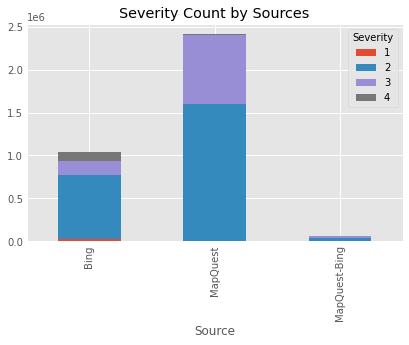

In [5]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

## Extract year, month, day, hour, weekday, and time to clear accidents

In [6]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

## Deal with outliers 
### 1. Drop rows with negative time_duration

In [7]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
309387    -30.0
309388    -30.0
860988    -12.0
861024    -31.0
861041     -0.0
861475    -14.0
861494     -0.0
861495    -30.0
1497823   -30.0
1497824   -31.0
2234574   -30.0
2234659   -30.0
2234660   -31.0
3104499   -34.0
3104975    -7.0
3104978    -7.0
3232740   -31.0
Name: Time_Duration(min), dtype: float64

In [8]:
# Drop the rows with td<0

neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)

In [9]:
# Double check to make sure no more negative td
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

## Deal with outliers
### 2. Fill outliers with median values

In [10]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [11]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 10140.0 minutes or 169.0 hours or 7.0 days; Min to clear an accident td: 1.0 minutes.


## Select the state of interest: MO

In [12]:
# Set state
state='MO'

# Select the state of Missouri
df_state=df.loc[df.State==state].copy()
df_state.drop('State', axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33632 entries, 167304 to 3513307
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     33632 non-null  object        
 1   Source                 33632 non-null  object        
 2   TMC                    20412 non-null  float64       
 3   Severity               33632 non-null  float64       
 4   Start_Time             33632 non-null  datetime64[ns]
 5   End_Time               33632 non-null  datetime64[ns]
 6   Start_Lat              33632 non-null  float64       
 7   Start_Lng              33632 non-null  float64       
 8   End_Lat                13220 non-null  float64       
 9   End_Lng                13220 non-null  float64       
 10  Distance(mi)           33632 non-null  float64       
 11  Description            33632 non-null  object        
 12  Number                 4081 non-null   float64       

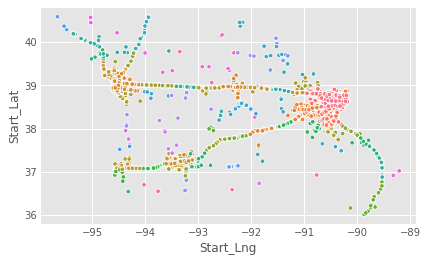

In [13]:
# Map of accidents, color code by county
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

## Select a list of features for exploration
#### Only selecting relevant columns

In [14]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','Severity','Start_Time','Start_Lng','Start_Lat','Distance(mi)','Street','Side','City','County','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)','Precipitation(in)',
             'Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Year','Month','Day','Hour','Weekday', 'Time_Duration(min)']

In [15]:
# Select the dataset to include only the selected features
df_feat=df_state[feature_lst].copy()
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33632 entries, 167304 to 3513307
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Source              33632 non-null  object        
 1   Severity            33632 non-null  float64       
 2   Start_Time          33632 non-null  datetime64[ns]
 3   Start_Lng           33632 non-null  float64       
 4   Start_Lat           33632 non-null  float64       
 5   Distance(mi)        33632 non-null  float64       
 6   Street              33632 non-null  object        
 7   Side                33632 non-null  object        
 8   City                33632 non-null  object        
 9   County              33632 non-null  object        
 10  Temperature(F)      32943 non-null  float64       
 11  Humidity(%)         32910 non-null  float64       
 12  Pressure(in)        32963 non-null  float64       
 13  Visibility(mi)      32906 non-null  flo

## Drop rows with missing values

In [16]:
# Check missing values
df_feat.isnull().mean()

Source                0.000000
Severity              0.000000
Start_Time            0.000000
Start_Lng             0.000000
Start_Lat             0.000000
Distance(mi)          0.000000
Street                0.000000
Side                  0.000000
City                  0.000000
County                0.000000
Temperature(F)        0.020486
Humidity(%)           0.021468
Pressure(in)          0.019892
Visibility(mi)        0.021587
Wind_Direction        0.005828
Wind_Speed(mph)       0.086822
Precipitation(in)     0.557594
Weather_Condition     0.022687
Amenity               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Signal        0.000000
Turning_Loop          0.000000
Sunrise_Sunset        0.000000
Year                  0.000000
Month   

Almost 60% OF 'Precipitation(in)' is missing. Drop na won't work for this feature. 'Precipitation(in)' could be a useful predictor and hence can be handled by separating feature.
## Separate Feature

In [17]:
# Add new feature for missing values in 'Precipitation(in)'
df_feat['Precipitation_NA'] = 0
df_feat.loc[df_feat['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df_feat['Precipitation(in)'] = df_feat['Precipitation(in)'].fillna(df_feat['Precipitation(in)'].median())
df_feat.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA


In [18]:
# Replace missing values with median
df_feat.dropna(subset=df_feat.columns[df_feat.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_feat.shape

(30585, 38)

## Exploration of time features

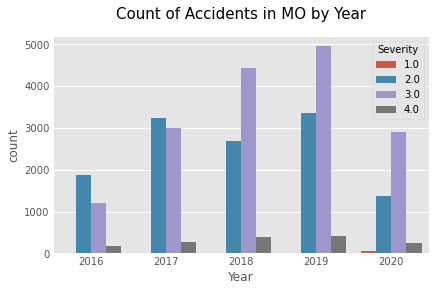

In [19]:
df_feat.Year = df_feat.Year.astype(int)
sns.countplot(x='Year', hue='Severity', data=df_feat)
plt.title('Count of Accidents in MO by Year', size=15, y = 1.05)
plt.show()

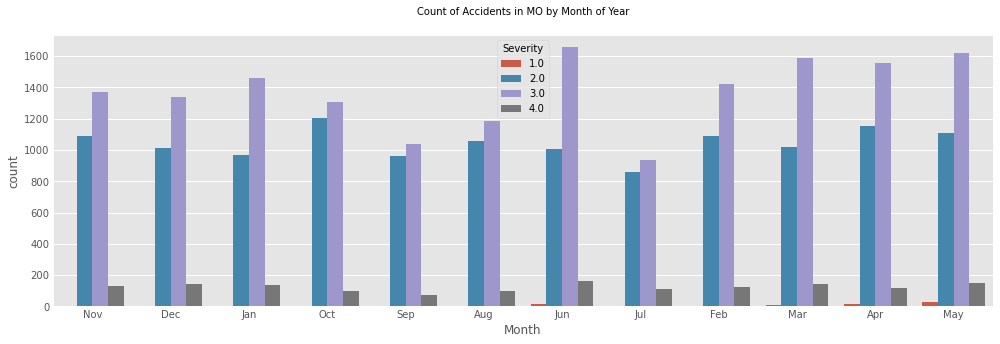

In [20]:
plt.figure(figsize=(15,5))
df_feat.Month = df_feat.Month.astype(str)
sns.countplot(x='Month', hue='Severity', data=df_feat)
plt.title('Count of Accidents in MO by Month of Year', size=10, y=1.05)
plt.show()

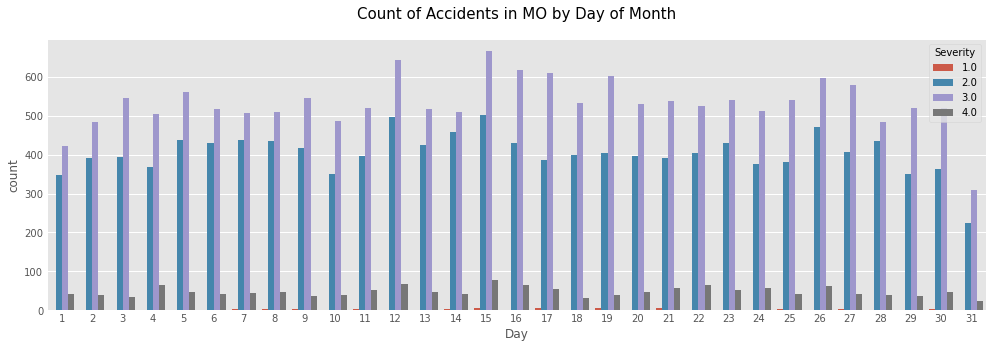

In [21]:
plt.figure(figsize=(15,5))
df_feat.Day = df_feat.Day.astype(int)
sns.countplot(x='Day', hue='Severity', data=df_feat)
plt.title('Count of Accidents in MO by Day of Month', size=15, y=1.05)
plt.show()

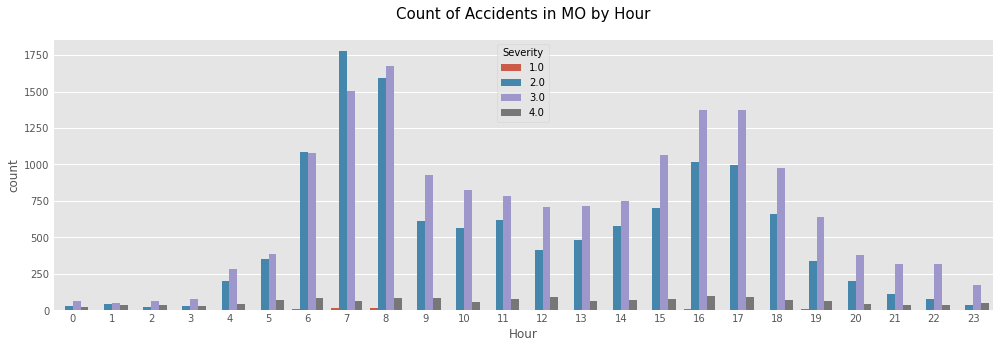

In [22]:
plt.figure(figsize=(15,5))
df_feat.Hour = df_feat.Hour.astype(int)
sns.countplot(x='Hour', hue='Severity', data=df_feat)
plt.title('Count of Accidents in MO by Hour', size=15, y=1.05)
plt.show()

## Exploration of period of day

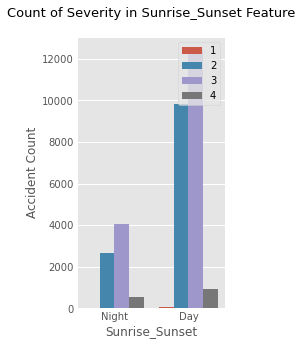

In [23]:
# Severity breakdown for sunrise vs. sunset
period_features = ['Sunrise_Sunset']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity', data=df_feat)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    
    plt.legend(['1','2','3','4'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in Sunrise_Sunset Feature'.format(feature), size=13, y=1.05)
plt.show()

Text(0.5, 1.0, 'Traffic Accidents Percentages by Time')

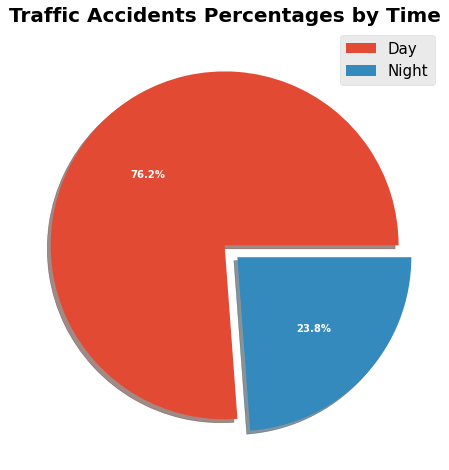

In [24]:
# Percentage breakdown of day vs. night accident count
plt.figure(figsize = (12,8))
daynight = plt.pie(df_feat['Sunrise_Sunset'].value_counts(),autopct='%1.1f%%',shadow = True, explode = (0,0.1), textprops=dict(color="w",weight = 'bold'))
plt.legend(['Day','Night'], loc="best",prop={'size': 15})
plt.title('Traffic Accidents Percentages by Time',fontsize=20,weight='bold')

## Exploration of most common weather features

In [25]:
#Normalize features with skewed distribution first
from scipy.stats import boxcox
df_feat['Pressure_bc']= boxcox(df_feat['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df_feat['Visibility_bc']= boxcox(df_feat['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df_feat['Wind_Speed_bc']= boxcox(df_feat['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df_feat = df_feat.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

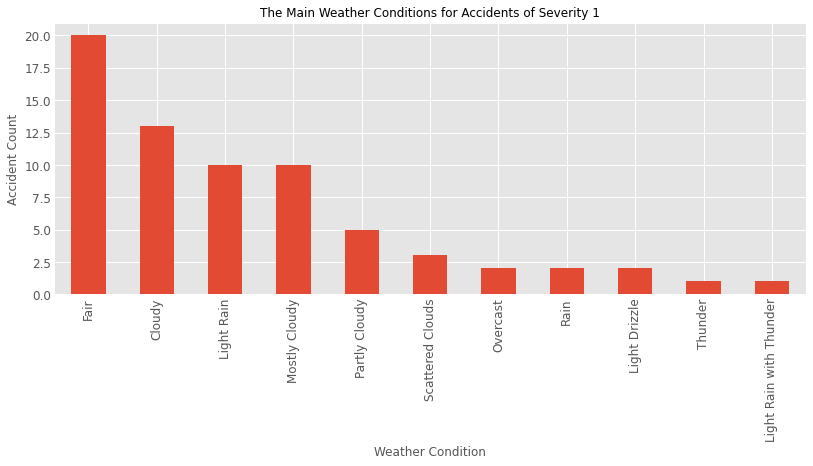

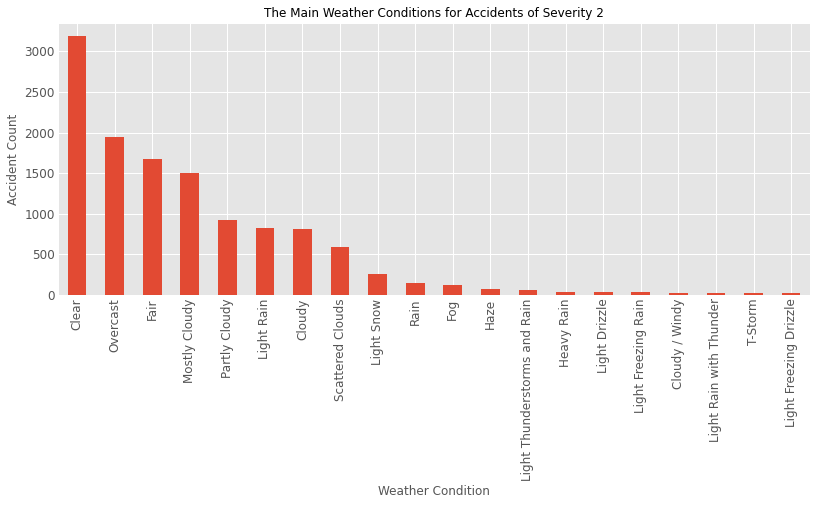

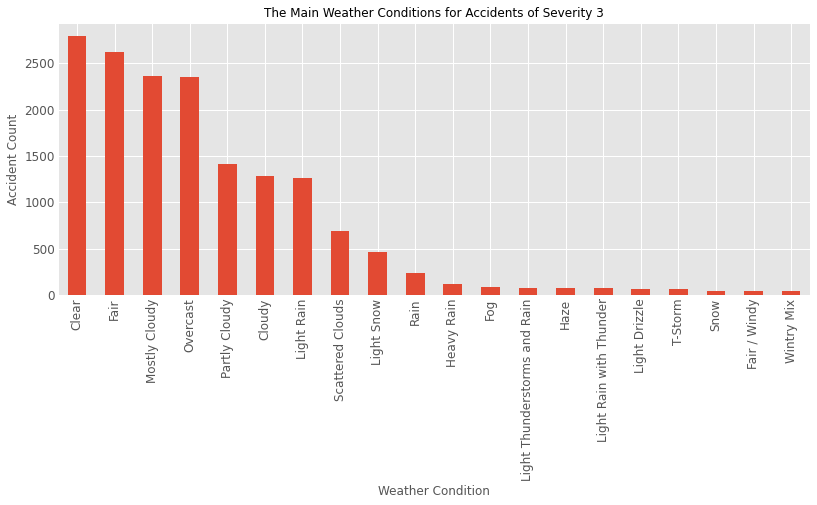

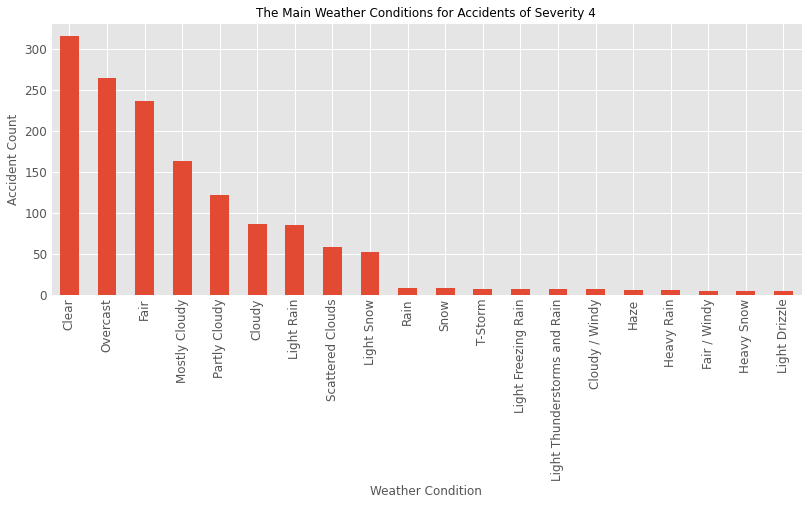

In [26]:
# Top weather conditions for each severity level
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df_feat.loc[df_feat["Severity"] == s]["Weather_Condition"].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,align='center',linewidth=1)
    plt.xlabel("Weather Condition",fontsize=12)
    plt.ylabel('Accident Count',fontsize=12)
    plt.title('The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

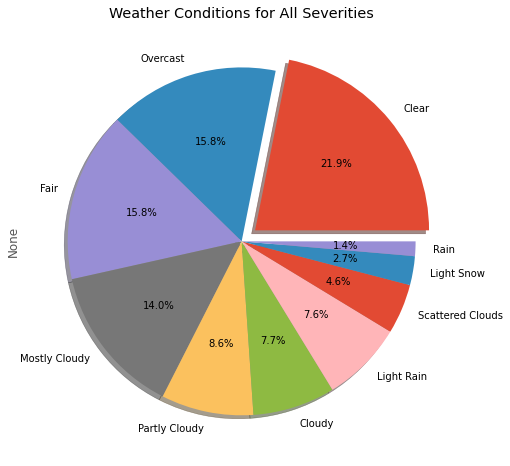

In [27]:
# Top 10 weather conditions for all accident severity levels
plt.figure(figsize=(14,8))
df_feat.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:10] \
        .plot.pie(explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.title('Weather Conditions for All Severities')
plt.ioff()

## Exploration of where accidents are occuring

In [28]:
#street classification
def str_type(text):
    if '-' in text or 'Fwy'in text or 'Expy' in text or 'Highway'in text or 'Hwy'in text :
        result = 'Highway'
    else:
        result = 'others'
    return result

df_feat['Street_Type'] = df_feat['Street'].apply(str_type)

In [29]:
df_feat[['Street_Type']].head(5)

,Street_Type
167304,Highway
167314,Highway
167327,Highway
167343,Highway
167355,Highway


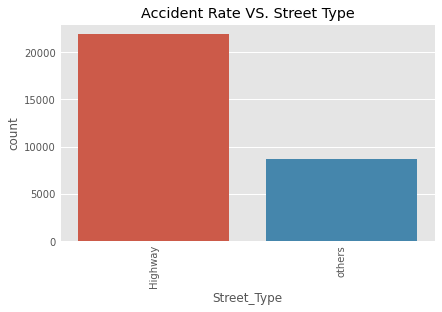

In [30]:
# accident rates vs. street_type
e = sns.countplot(x = 'Street_Type', data = df_feat)
e.set_title('Accident Rate VS. Street Type')
plt.xticks(rotation = 90)
plt.show()
#given that the mileage of highway is much less than other roads, this plot indicates that there is a higher probability of accident occurs in highway

In [31]:
# Road feature impact
surround = ['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Signal', 'Turning_Loop']
count = {}

for i in range(len(surround)):
    try:
        acc_count = df_feat[surround[i]].value_counts()[1]
        count.setdefault(surround[i], acc_count)
    except(KeyError):
        count.setdefault(surround[i],0)

In [32]:
# Count of accidents based on road feature
surroundings = df_feat.from_dict(count, orient = 'index', columns = ['Accidents'])
surroundings = surroundings.sort_values('Accidents', ascending = False)
surroundings

,Accidents
Junction,5617
Traffic_Signal,3221
Crossing,536
Give_Way,203
Station,193
Amenity,120
Stop,117
Railway,85
No_Exit,40
Bump,1


Text(0.5, 1.0, 'Common Road Features and Traffic Accidents in Missouri')

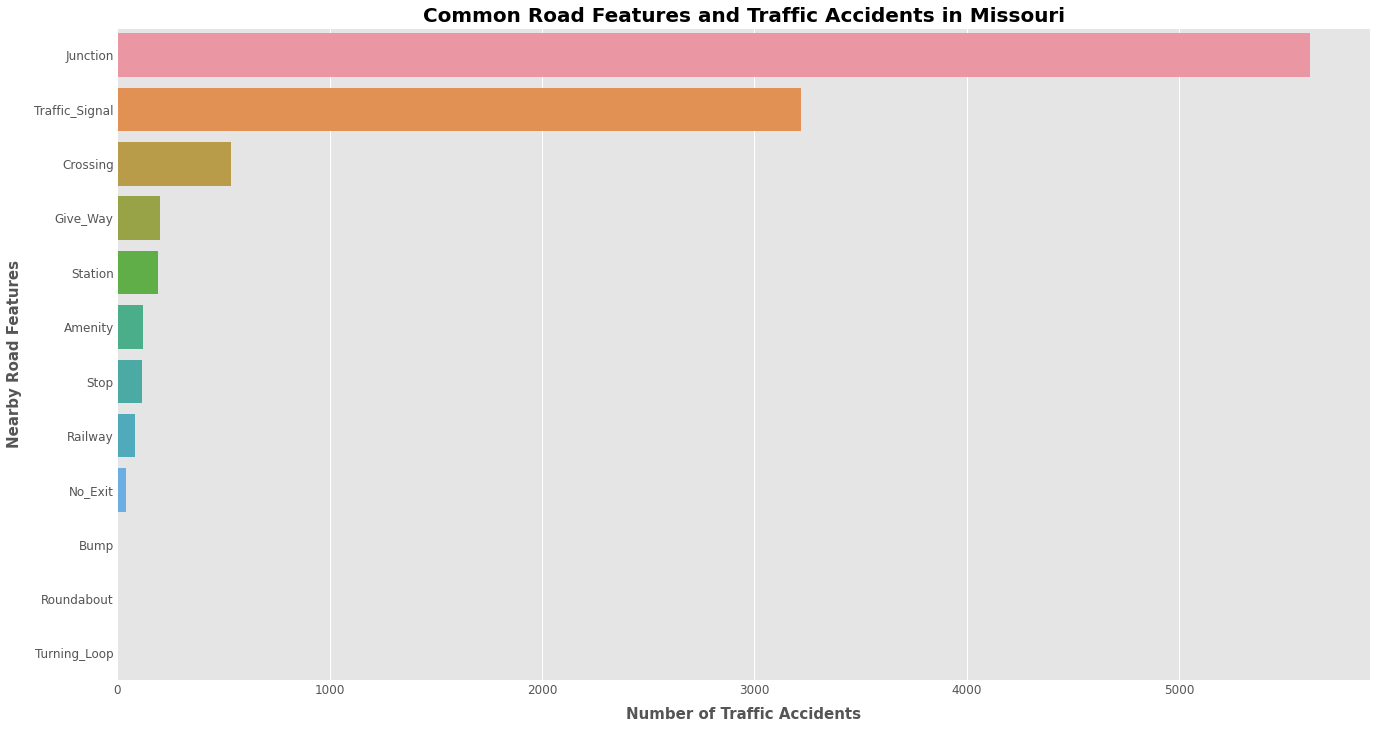

In [33]:
# Visualize road feature accident count
plt.figure(figsize=(20,12))
sns.barplot(surroundings['Accidents'],surroundings.index)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("Nearby Road Features", labelpad = 12,fontsize=15, weight='bold')
plt.title("Common Road Features and Traffic Accidents in Missouri", fontsize=20,weight='bold')

## Correlation and Feature Cleanup for Machine Learning

[]

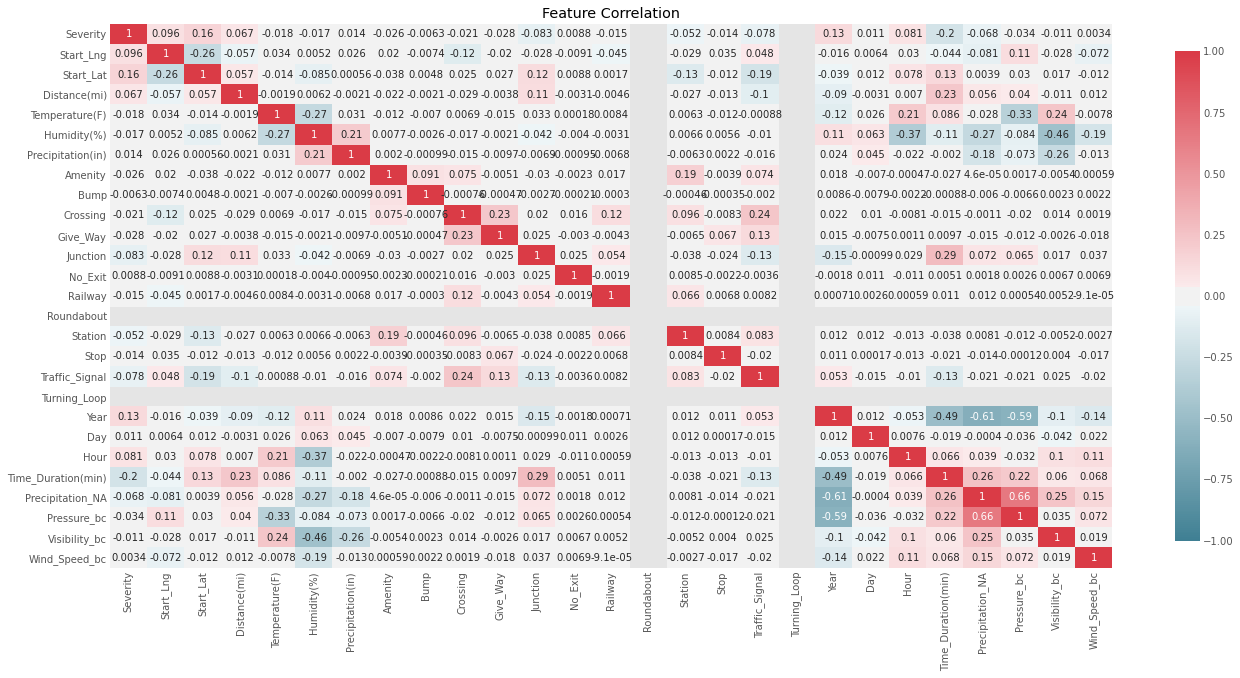

In [34]:
# Feature correlation heat map
corr=df_feat.corr()

f, ax = plt.subplots(figsize=(20, 10))
g=sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=False, ax=ax, annot=True, vmax=1.0, vmin=-1.0, cbar_kws={"shrink": 0.9})
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.set_title('Feature Correlation')
plt.plot()

In [35]:
# Remove features with no correlation
df = df_feat.drop(['Start_Time','Source', 'Street','Turning_Loop', 'Roundabout', 'Bump', 'Year', 'Month', 'Day', 'Distance(mi)', 'Time_Duration(min)'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30585 entries, 167304 to 3513307
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           30585 non-null  float64
 1   Start_Lng          30585 non-null  float64
 2   Start_Lat          30585 non-null  float64
 3   Side               30585 non-null  object 
 4   City               30585 non-null  object 
 5   County             30585 non-null  object 
 6   Temperature(F)     30585 non-null  float64
 7   Humidity(%)        30585 non-null  float64
 8   Wind_Direction     30585 non-null  object 
 9   Precipitation(in)  30585 non-null  float64
 10  Weather_Condition  30585 non-null  object 
 11  Amenity            30585 non-null  float64
 12  Crossing           30585 non-null  float64
 13  Give_Way           30585 non-null  float64
 14  Junction           30585 non-null  float64
 15  No_Exit            30585 non-null  float64
 16  Railway        

## One-hot Encoding of categorical features

In [36]:
df = df.replace([True, False], [1,0])
cat = ['Side', 'City', 'County', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Weekday', 'Street_Type']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)
df.head()

,Severity,Start_Lng,Start_Lat,Temperature(F),Humidity(%),Precipitation(in),Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Hour,Precipitation_NA,Pressure_bc,Visibility_bc,Wind_Speed_bc,Side_R,City_Amazonia,City_Anabel,City_Annada,City_Arnold,City_Ash Grove,City_Ashland,City_Augusta,City_Auxvasse,City_Ballwin,City_Barnhart,City_Bates City,City_Battlefield,City_Beaufort,City_Belton,City_Benton,City_Bethany,City_Beulah,City_Billings,City_Blackwater,City_Bloomsdale,City_Blue Springs,City_Bois D Arc,City_Bolckow,City_Bolivar,City_Bonne Terre,City_Boonville,City_Bourbon,City_Bridgeton,City_Brighton,City_Brookline,City_Bunceton,City_Burlington Junction,City_Butler,City_Cadet,City_Camdenton,City_Cameron,City_Cape Girardeau,City_Carl Junction,City_Carterville,City_Carthage,City_Caruthersville,City_Catawissa,City_Cedar Hill,City_Centerview,City_Centralia,City_Charleston,City_Chesterfield,City_Chestnutridge,City_Clarence,City_Clayton,City_Clearmont,City_Colfax,City_Collins,City_Columbia,City_Concordia,City_Conway,City_Craig,City_Crystal City,City_Cuba,City_Curryville,City_De Soto,City_Dearborn,City_Deepwater,City_Defiance,City_Diamond,City_Dittmer,City_Eagleville,City_Earth City,City_Eldon,City_Ellisville,City_Elmo,City_Eolia,City_Eugene,City_Eureka,City_Exeter,City_Fair Grove,City_Fairfax,City_Farmington,City_Faucett,...,County_Shelby,County_St. Charles,County_St. Clair,County_St. Francois,County_St. Louis City,County_St. Louis County,County_Ste Genevieve,County_Taney,County_Texas,County_Vernon,County_Warren,County_Washington,County_Webster,County_Wright,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Freezing Rain,Weather_Condition_Funnel Cloud,Weather_Condition_Haze,Weather_Condition_Heavy Freezing Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Snow,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Freezing Rain / Windy,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow and Sleet,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow and Sleet,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Street_Type_others
167304,3

## Predict accident severity with various supervised machine learning algorithms
### Data preparation: train_test_split

In [51]:
# Split X, y
X = df.drop('Severity', axis = 1)
y = df['Severity']

#Standardizing features based on unit variance
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print("Train size:",X_train.shape[0])
print("Test size:",X_test.shape[0])

Train size: 24468
Test size: 6117


In [52]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

### First Algorithm: Logistic Regression

In [53]:
# Logistic regression
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.654.


### Second Algorithm: The K-Nearest Neighbors (KNN) Algorithm
#### KNN with 6 neighbors

In [54]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.601.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.601.


### Second Algorithm: The K-Nearest Neighbors (KNN) Agorithm
#### Optimize the number of neighbors: Plot the accuracy versus number of neighbors

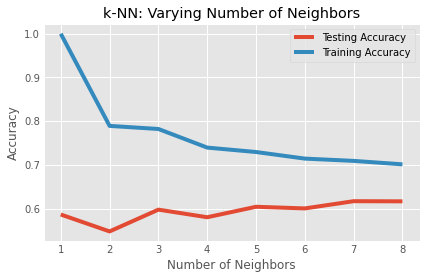

In [55]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [56]:
# k=7 appears to appears to provide the highest accuracy
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.617.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.617.


### Third Algorithm: Decision Tree

In [57]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.657.
[Decision Tree -- gini] accuracy_score: 0.665.


### Algorithm four: Random Forest
#### n_estimators = 100

In [58]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.709.


### Algorithm four: Random Forest
#### Vizualize important features

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

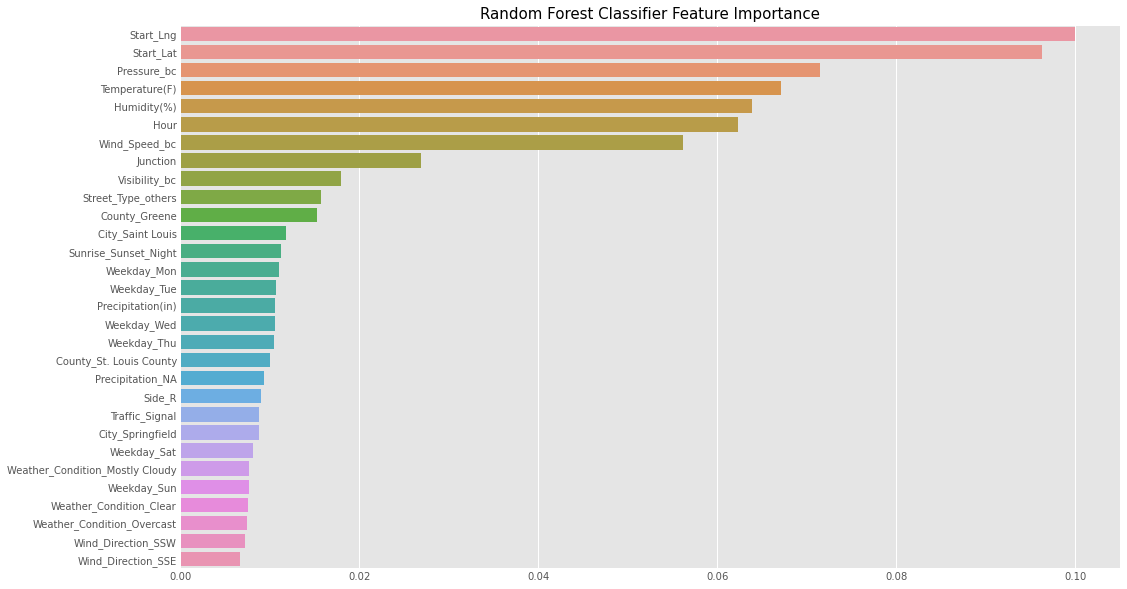

In [59]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity',axis=1).columns)

importances.iloc[:,0] = clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

### Algorithm Comparison

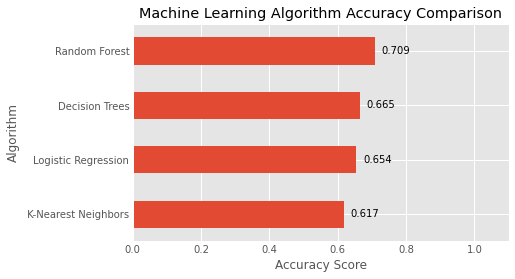

In [63]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False)

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),3)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Machine Learning Algorithm Accuracy Comparison')

plt.show()

## Results & Discussion 

Four machine learning algorithms were utilized to predict accident severity. The accuracy of all four were below my expectation and an acceptable accuracy rate within the data science field. The Random Forest machine learning algorithm proved to be the best predictor of accident severity with an accuracy rate of 0.71. 

I believe one detractor to accurate machine learning was unbalanced data in my feature set. For example, the road feature ‘Stop’ has 117 Trues versus 30,468 Falses. There are many other features with this imbalance. In the future, I would balance these binary features. Likewise, the target class ‘Severity’ was also imbalanced with severity 1 and 4 having very little data in comparison to severity levels 2 and 3. 

Though the machine learning did not perform well, there were features identified through the Random Forest machine learning as having the greatest impact on predicting accident severity (Figure 11). Weather features with the greatest importance were air pressure (‘Pressure_bc’), temperature (‘Temperature(F)’) and humidity (‘Humidity(%)’). A deeper dive into the pressure amount, temperature and humidity percentage would be necessary in order to provide actionable information to Missouri drivers. One road feature bubbled to the top of the important features list: ‘Junction’. Missouri drivers should proceed with caution when approaching and driving through a junction, as the possibility of a high severity accident is greater.

The ‘Hour’ of the accident occurrence is an important feature when predicting accident severity. Hours of the day in which Missouri drivers should be most cautious are between 7 and 8 AM and 4 and 5 PM (Figure 5). Monday is the most likely day of the week to involve a high severity accident in Missouri and Greene County, Missouri is the most likely county in which a severe accident can occur. Accidents in Missouri are most likely to impact the right side (‘Side_R’) of the vehicle. Lastly, contrary to my thoughts going into this project, accidents are most likely to occur without the involvement of precipitation (‘Precipitation_NA’).

## Conclusion

The purpose of this project was to predict the severity of an accident based on occurrence parameters, road, and weather conditions in the state of Missouri. I explored the various weather, road and accident occurrence features associated with accident in Missouri between February 2016 and June 2020. I built both regression models and classification models to predict the severity of accidents in Missouri and through these models, identified the top important factors in determining severity. Though there may be no actionable steps Missourians can take to lower their risk of being involved in a severe accident as a result of this project, I believe an awareness of important factors involved is a good first step.